# Clean and Analyze Employee Exit Surveys

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) body of the Queensland government in Australia.

We'll pretend our stakeholders want us to combine the results for both surveys to answer the following question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

### Introduction 

In [32]:
#Import Libraries
import pandas as pd
import numpy as np


In [33]:
#Read in csv files
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [34]:
#Print df info (dete survey)
print(dete_survey.head())
print(dete_survey.info())



   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [36]:
#using value_counts and is_null methods
print(dete_survey['Position'].value_counts())
dete_survey['Position'].isnull()

Position
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Deputy Principal                                             4
Business Service Manager                                     4
Name: count, dtype: int64


0      False
1      False
2      False
3      False
4      False
       ...  
817    False
818    False
819    False
820    False
821    False
Name: Position, Length: 822, dtype: bool

In [37]:
#Print df info (tafe survey)
print(tafe_survey.head())
print(tafe_survey.info())


      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

In [38]:
#using value_counts and is_null methods
print(tafe_survey['Employment Type. Employment Type'].value_counts())
tafe_survey['Employment Type. Employment Type'].isnull()

Employment Type. Employment Type
Permanent Full-time    237
Temporary Full-time    177
Contract/casual         71
Permanent Part-time     59
Temporary Part-time     52
Name: count, dtype: int64


0      False
1       True
2       True
3       True
4      False
       ...  
697    False
698     True
699    False
700    False
701    False
Name: Employment Type. Employment Type, Length: 702, dtype: bool

### Identify Missing Values and Drop Unnecessary Columns

In [39]:
#Import dete_survey.csv renaming empty cell
dete_survey_updated = pd.read_csv('dete_survey.csv',na_values="Not Stated")

In [40]:
dete_survey_updated.drop(dete_survey.columns[28:49], axis=1)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

From this section, non needed columns were removed from both csv files. 

### Clean Column Names 

In [41]:
#update column names 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()
#print columns
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [42]:
#update column names2
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)
tafe_survey_updated.columns
                                                            
                                                            


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Made updates to column names for both axis'. This included renaming columns to the proper name and changing the format of the column names to be user friendly. 

### Filter the Data 

In [15]:
#reviewing he unique values in "separationtype" column in both data sets
dete_survey_updated['separationtype'].value_counts()


separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [43]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [44]:
#dete survey 
pattern = r"[Resignation]"
yes_contains =dete_survey_updated['separationtype'].str.contains(pattern)
dete_resignations=dete_survey_updated[yes_contains].copy()



In [45]:
#tafe_resignations
pattern = r"[Resignation]"
yes_contains =tafe_survey_updated['separationtype'].str.contains(pattern,na=False)
tafe_resignations=tafe_survey_updated[yes_contains].copy()

### Verify the Data 

In [46]:
#Use value_counts for each dataset
#dete survey
dete_resignations['cease_date'].value_counts().astype(float)

cease_date
2012       344.0
2013       200.0
01/2014     43.0
12/2013     40.0
09/2013     34.0
06/2013     27.0
07/2013     22.0
10/2013     20.0
11/2013     16.0
08/2013     12.0
05/2013      7.0
05/2012      6.0
07/2014      2.0
04/2014      2.0
08/2012      2.0
04/2013      2.0
02/2014      2.0
11/2012      1.0
09/2010      1.0
2010         1.0
2014         1.0
07/2012      1.0
09/2014      1.0
07/2006      1.0
Name: count, dtype: float64

In [47]:
#tafe survey
tafe_resignations['cease_date'].value_counts().astype(float)

cease_date
2011.0    267.0
2012.0    235.0
2010.0    103.0
2013.0     85.0
2009.0      4.0
Name: count, dtype: float64

In [49]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

dete_start_date
1963.0     4
1965.0     1
1966.0     1
1967.0     2
1968.0     3
1969.0    10
1970.0    21
1971.0    10
1972.0    12
1973.0     8
1974.0    14
1975.0    21
1976.0    15
1977.0    11
1978.0    15
1979.0    14
1980.0    14
1981.0     9
1982.0     4
1983.0     9
1984.0    10
1985.0     8
1986.0    12
1987.0     7
1988.0    15
1989.0    17
1990.0    20
1991.0    18
1992.0    18
1993.0    13
1994.0    10
1995.0    14
1996.0    19
1997.0    14
1998.0    14
1999.0    19
2000.0    18
2001.0    10
2002.0    15
2003.0    15
2004.0    18
2005.0    20
2006.0    23
2007.0    34
2008.0    31
2009.0    24
2010.0    27
2011.0    40
2012.0    27
2013.0    21
Name: count, dtype: int64

### Create New Column

In [51]:
#convert date to str (dete)
date =dete_resignations['cease_date'].astype(str)
dete_resignations['cease_date'] = pd.to_datetime(date)
dete_resignations['Year'] = dete_resignations['cease_date'].dt.strftime('%Y')
#print(dete_resignations['Year'])

#print(dete_resignations['cease_date']).dt.year
dete_resignations['cease_date_YEAR']= pd.DatetimeIndex(dete_resignations['cease_date']).year

#dete_resignations['dete_start_date_YEAR']= dete_resignations['dete_start_date'].dt.strftime('%Y')
#df['Year'] = df['InsertedDate'].dt.strftime('%Y')
#print(dete_resignations['dete_start_date'])
#create institute_service
dete_resignations['institute_service'] = dete_resignations['cease_date_YEAR'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'])


0      28.0
1       NaN
2       1.0
3       7.0
4      42.0
       ... 
817    37.0
818    34.0
819     5.0
820    12.0
821     NaN
Name: institute_service, Length: 822, dtype: float64


/var/folders/rh/bf0lvj0s1yl0b2qls8mzwt7m0000gn/T/ipykernel_15454/2064290623.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dete_resignations['cease_date'] = pd.to_datetime(date)


###  Identify Dissatisfied Employees

In [52]:
tafe_resignations['Contributing Factors. Dissatisfaction'].head(20)

0                                        NaN
1                                          -
2                                          -
3                                          -
4                                          -
5                                          -
6                                          -
7                                          -
8                                          -
9                                          -
10                                         -
11                                       NaN
12                                       NaN
13                                         -
14    Contributing Factors. Dissatisfaction 
15                                         -
16                                       NaN
17                                         -
18                                       NaN
19                                         -
Name: Contributing Factors. Dissatisfaction, dtype: object

In [53]:
#Use value_counts on Tefe dataset
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()


Contributing Factors. Dissatisfaction
-                                         371
Contributing Factors. Dissatisfaction      66
Name: count, dtype: int64

In [54]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      360
Job Dissatisfaction     77
Name: count, dtype: int64

In [70]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)



dissatisfied
False    447
True     375
Name: count, dtype: int64

In [71]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)


### Combine the Data 

In [72]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined_updated = combined.dropna(thresh=500)
# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait        3
south_sea            7
aboriginal          16
disability          23
nesb                32
                  ... 
cease_date        1482
dissatisfied      1523
separationtype    1523
institute         1523
id                1523
Length: 76, dtype: int64

In [73]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated.head(20)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,region,employment_status,career_move_to_public_sector,career_move_to_private_sector,...,gender,age,Year,cease_date_YEAR,institute_service,dissatisfied,institute,Institute,WorkArea,role_service
0,1.0,Ill Health Retirement,2012-08-01 00:00:00,1984.0,2004.0,Public Servant,Central Office,Permanent Full-time,True,False,...,Male,56-60,2012,2012.0,28.0,True,DETE,NaN,NaN,NaN
1,2.0,Voluntary Early Retirement (VER),2012-08-01 00:00:00,NaN,NaN,Public Servant,Central Office,Permanent Full-time,False,False,...,Male,56-60,2012,2012.0,NaN,False,DETE,NaN,NaN,NaN
2,3.0,Voluntary Early Retirement (VER),2012-05-01 00:00:00,2011.0,2011.0,Schools Officer,Central Office,Permanent Full-time,False,False,...,Male,61 or older,2012,2012.0,1.0,False,DETE,NaN,NaN,NaN
3,4.0,Resignation-Other reasons,2012-05-01 00:00:00,2005.0,2006.0,Teacher,Central Queensland,Permanent Full-time,False,True,...,Female,36-40,2012,2012.0,7.0,False,DETE,NaN,NaN,NaN
4,5.0,Age Retirement,2012-05-01 00:00:00,1970.0,1989.0,Head of Curriculum/Head of Special Education,South East,Permanent Full-time,False,False,...,Female,61 or older,2012,2012.0,42.0,True,DETE,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012-05-01 00:00:00,1994.0,1997.0,Guidance Officer,Central Office,Permanent Full-time,False,True,...,Female,41-45,2012,2012.0,18.0,True,DETE,NaN,NaN,NaN
6,7.0,Age Retirement,2012-05-01 00:00:00,1972.0,2007.0,Teacher,Darling Downs South West,Permanent Part-time,False,False,...,Female,56-60,2012,2012.0,40.0,True,DETE,NaN,NaN,NaN
7,8.0,Age Retirement,2012-05-01 00:00:00,1988.0,1990.0,Teacher Aide,North Coast,Permanent Part-time,False,False,...,Female,61 or older,2012,2012.0,24.0,False,DETE,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012-07-01 00:00:00,2009.0,2009.0,Teacher,North Queensland,Permanent Full-time,False,True,...,Female,31-35,2012,2012.0,3.0,False,DETE,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012-01-01 00:00:00,1997.0,2008.0,Teacher Aide,NaN,Permanent Part-time,False,False,...,Female,46-50,2012,2012.0,15.0,True,DETE,NaN,NaN,NaN


### Clean the Service Column 

In [74]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')

In [75]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [76]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

service_cat
Veteran        605
New            339
Experienced    264
Established    107
Name: count, dtype: int64

### Perform Initial Analysis

In [77]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    769
True     754
Name: count, dtype: int64

In [78]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

### Clean the Service Column
Next, we'll clean the institute_service column and categorize employees according to the following definitions:

New: Less than 3 years in the workplace
Experienced: 3-6 years in the workplace
Established: 7-10 years in the workplace
Veteran: 11 or more years in the workplace

In [79]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

institute_service
nan                   208
Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
1.0                    36
5.0                    34
0.0                    31
3.0                    31
4.0                    28
6.0                    27
2.0                    23
22.0                   22
37.0                   21
9.0                    20
15.0                   18
13.0                   18
7.0                    17
43.0                   17
23.0                   17
24.0                   16
17.0                   16
38.0                   15
16.0                   15
21.0                   15
39.0                   14
12.0                   14
35.0                   14
14.0                   14
8.0                    14
10.0                   13
42.0                   13
11.0                   13
19.0                   13
34.0                

In [80]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()


institute_service_up
1.0     285
3.0     127
11.0    102
20.0     83
5.0      82
7.0      60
0.0      31
4.0      28
6.0      27
2.0      23
22.0     22
37.0     21
9.0      20
15.0     18
13.0     18
43.0     17
23.0     17
17.0     16
24.0     16
38.0     15
16.0     15
21.0     15
35.0     14
8.0      14
12.0     14
14.0     14
39.0     14
19.0     13
42.0     13
10.0     13
34.0     12
32.0     12
41.0     11
33.0     11
18.0     11
26.0     11
31.0     10
25.0     10
29.0      8
28.0      8
40.0      8
44.0      7
27.0      7
36.0      7
45.0      5
30.0      4
49.0      3
46.0      1
50.0      1
48.0      1
Name: count, dtype: int64

In [81]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

service_cat
Veteran        605
New            339
Experienced    264
Established    107
Name: count, dtype: int64

### Perform Some Initial Analysis
Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [82]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    769
True     754
Name: count, dtype: int64

In [83]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<Axes: xlabel='service_cat'>

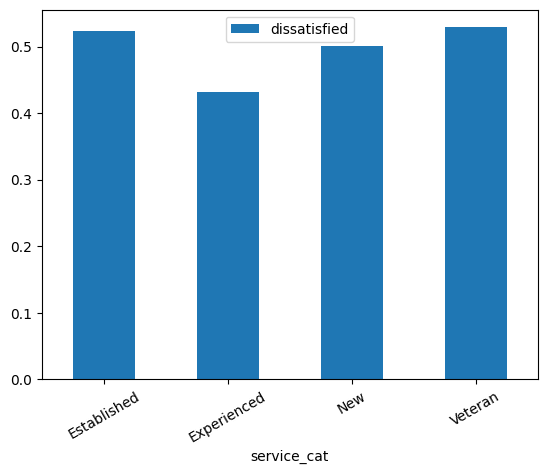

In [84]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)